## Linear Models + correlation
#### genearate a Linear model from your data, create necessary graphs and obtain its R2 score.

**Decidi cambiar el dataset pues el dataset de ventas no era bueno para predicciones lineales**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Student_Performance.csv")
print(df.shape)
df.head()

(10000, 6)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df['Extracurricular Activities'] = LabelEncoder().fit_transform(df['Extracurricular Activities'])

X = df.drop('Performance Index', axis=1)  
y = df['Performance Index'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=98)

In [10]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R^2 del modelo: {r2}')

R^2 del modelo: 0.9882540931001387


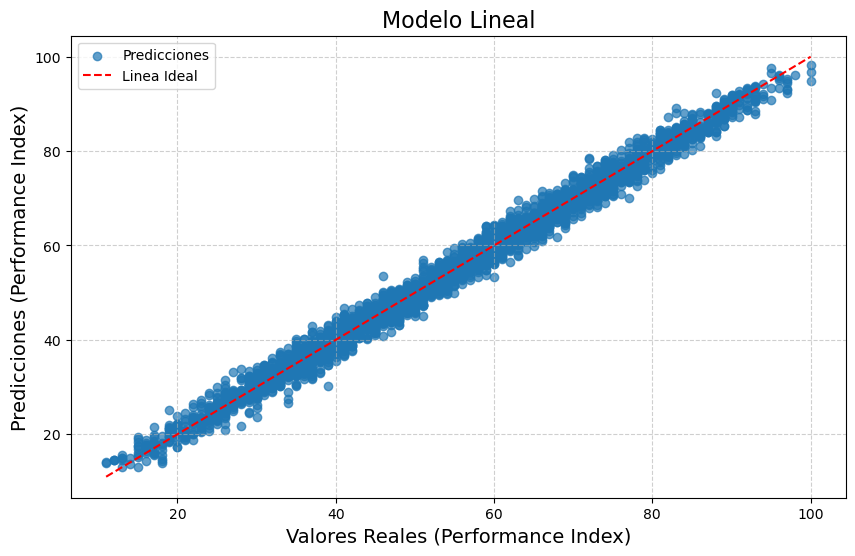

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predicciones")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Linea Ideal")
plt.title(f'Modelo Lineal', fontsize=16)
plt.xlabel('Valores Reales (Performance Index)', fontsize=14)
plt.ylabel('Predicciones (Performance Index)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [15]:
import seaborn as sns

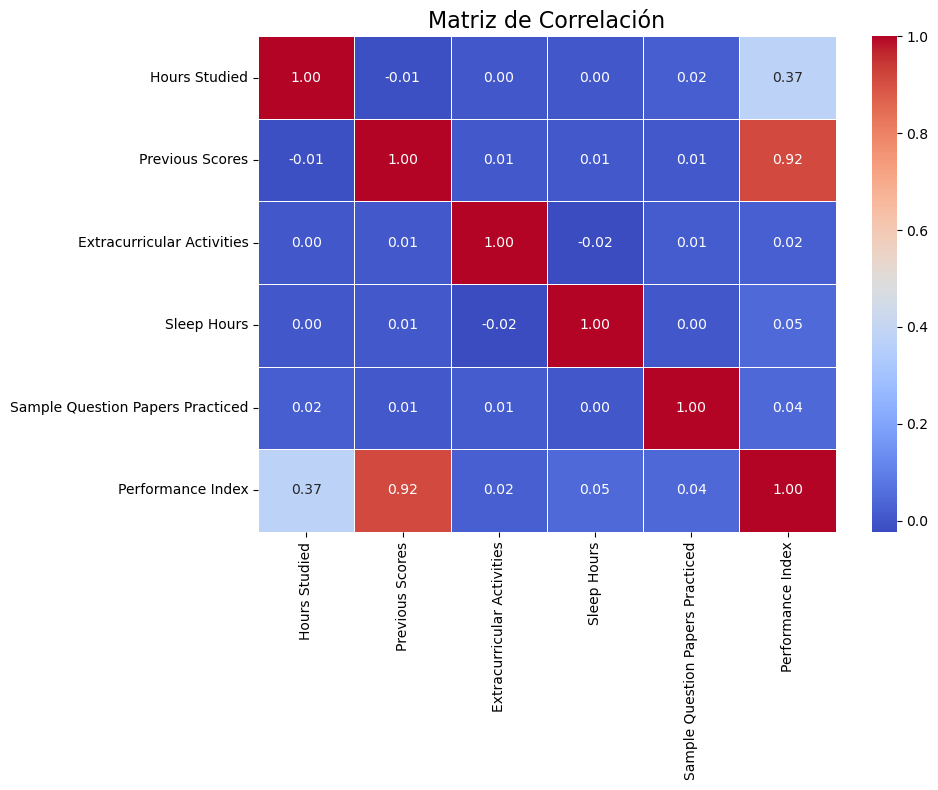

In [16]:
matriz_correlacion = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación', fontsize=16)
plt.tight_layout()
plt.show()